In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Shenzhen_OD.csv")
df

,cell pair,edge weight,wkt
0,"(146440, 146864)",6,LINESTRING(114.18033648688916 22.6373228516824...
1,"(78677, 138405)",1,LINESTRING(113.94660281079621 22.5334512061988...
2,"(78677, 79525)",11,LINESTRING(113.94660281079621 22.5334512061988...
3,"(79525, 138405)",1,LINESTRING(113.94952448174737 22.5334512061988...
4,"(130719, 130720)",10,LINESTRING(114.12628557429267 22.6818392711754...
...,...,...,...
758124,"(161208, 176016)",1,LINESTRING(114.23146572853449 22.7344495851217...
758125,"(161208, 166718)",1,LINESTRING(114.23146572853449 22.7344495851217...
758126,"(160779, 176016)",1,LINESTRING(114.23000489305892 22.7411944971661...
758127,"(160779, 166718)",1,LINESTRING(114.23000489305892 22.7411944971661...


<Axes: >

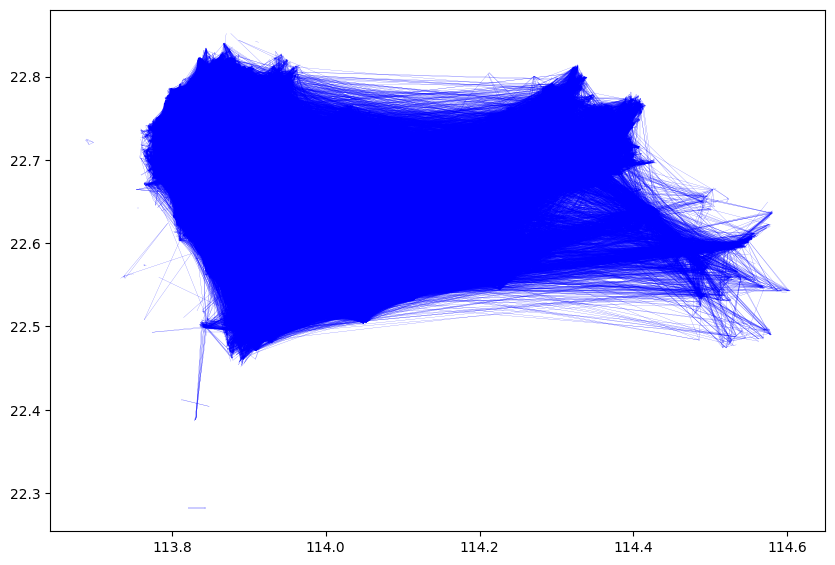

In [3]:
df["geometry"] = df["wkt"].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf.set_crs(epsg=4326, inplace=True).drop(columns=["wkt"], inplace=True)
gdf.rename(columns={'edge weight':'weight'}, inplace=True)
gdf.plot(figsize=(10, 10), color="blue", lw=0.1)

In [4]:
grid = gpd.read_file("data/Shenzhen_grids.shp")
grid = grid.to_crs(epsg=4326)
grid

,cell_id,wkt,area,geometry
0,203195,POLYGON((114.37535802287921 22.718936287419613...,22441.653345,"POLYGON ((114.37536 22.71894, 114.37536 22.720..."
1,131116,POLYGON((114.12701599203046 22.717587305010735...,22449.859888,"POLYGON ((114.12702 22.71759, 114.12702 22.718..."
2,131117,POLYGON((114.12701599203046 22.716238322601857...,22450.077094,"POLYGON ((114.12702 22.71624, 114.12702 22.717..."
3,131118,"POLYGON((114.12701599203046 22.71488934019298,...",22450.294288,"POLYGON ((114.12702 22.71489, 114.12702 22.716..."
4,131119,"POLYGON((114.12701599203046 22.7135403577841,1...",22450.511470,"POLYGON ((114.12702 22.71354, 114.12702 22.714..."
...,...,...,...,...
41622,130821,"POLYGON((114.12555515655488 22.54356857426546,...",22477.826953,"POLYGON ((114.12556 22.54357, 114.12556 22.544..."
41623,130822,POLYGON((114.12555515655488 22.542219591856583...,22478.042569,"POLYGON ((114.12556 22.54222, 114.12556 22.543..."
41624,130823,POLYGON((114.12555515655488 22.540870609447705...,22478.258172,"POLYGON ((114.12556 22.54087, 114.12556 22.542..."
41625,166714,"POLYGON((114.24972617197925 22.74186898837054,...",22441.911761,"POLYGON ((114.24973 22.74187, 114.24973 22.743..."


<Axes: >

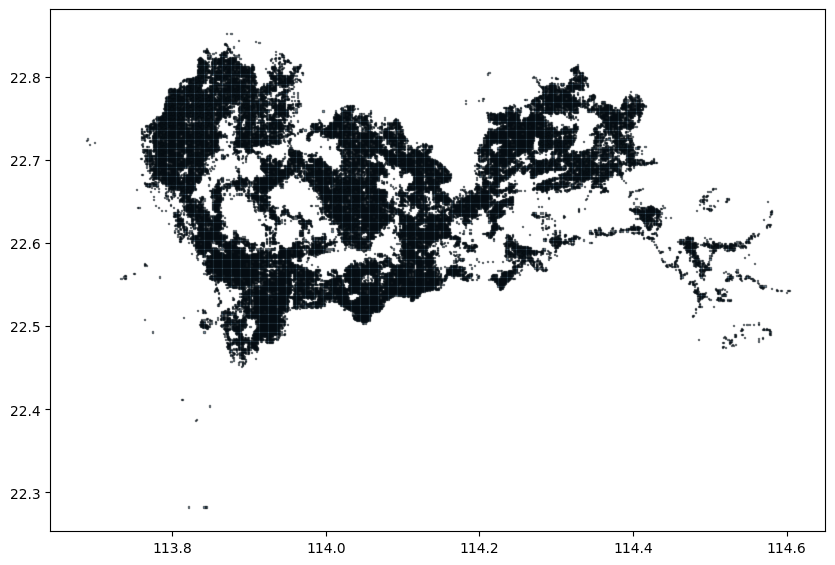

In [5]:
grid.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)

<Axes: >

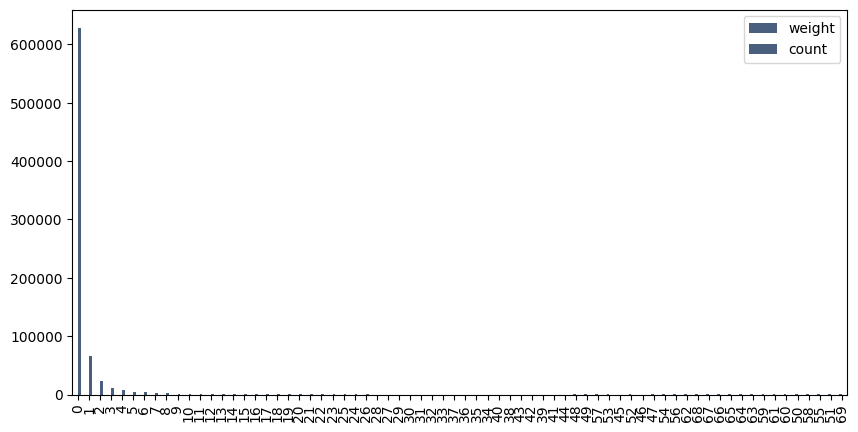

In [6]:
gdf.groupby('weight').size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).plot(kind='bar', figsize=(10,5), color='#4a5f7e')

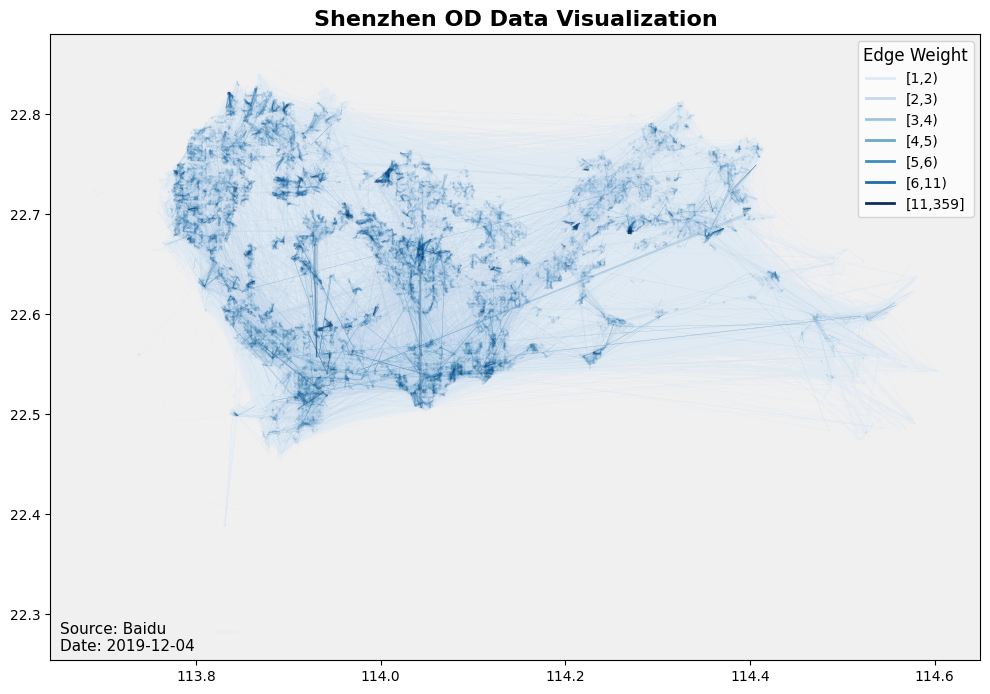

In [7]:
ax = gdf.query('weight < 2').plot(figsize=(12, 12), color="#dfeaf8", lw=0.1, label='[1,2)')
gdf.query('weight < 3 & weight >=2').plot(color="#c6d9ed", lw=0.1, label='[2,3)', ax=ax)
gdf.query('weight < 4 & weight >=3').plot(color="#9bc5df", lw=0.1, label='[3,4)', ax=ax)
gdf.query('weight < 5 & weight >=4').plot(color="#6ba8cc", lw=0.1, label='[4,5)', ax=ax)
gdf.query('weight < 6 & weight >=5').plot(color="#418abd", lw=0.1, label='[5,6)', ax=ax)
gdf.query('weight <= 10 & weight >=6').plot(color="#1f6ca9", lw=0.1, label='[6,11)', ax=ax)
gdf.query('weight > 10').plot(color="#0e2e60", lw=0.1, label='[11,max]', ax=ax)

# 背景设置为灰色
ax.set_facecolor('#f0f0f0')
ax.set_title("Shenzhen OD Data Visualization", fontsize=16, fontweight='bold')

# 构建图例映射
max_weight = gdf['weight'].max()
legend_labels = ['[1,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)', '[6,11)', f'[11,{max_weight}]']
legend_colors = ['#dfeaf8', '#c6d9ed', '#9bc5df', '#6ba8cc', '#418abd', '#1f6ca9', '#0e2e60']
legend_patches = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', title='Edge Weight', fontsize=10, title_fontsize=12)

# 标注
source = "Source: Baidu"  
date_info = "Date: 2019-12-04"      
ax.text(0.01, 0.01, f"{source}\n{date_info}", transform=ax.transAxes,
        fontsize=11, color='black', ha='left', va='bottom')

plt.show()

In [8]:
import ast

df["cell pair"] = df["cell pair"].apply(lambda x: ast.literal_eval(x))
df["O_cell_id"] = df["cell pair"].apply(lambda pair: pair[0])
df["D_cell_id"] = df["cell pair"].apply(lambda pair: pair[1])

In [9]:
grid['cell_id'] = grid['cell_id'].astype(int)

In [10]:
grid = (
    grid.merge(
        df.groupby('O_cell_id').agg({'edge weight':'sum'}).reset_index().rename(columns={'edge weight':'O','O_cell_id':'cell_id'}),
        on='cell_id',
        how='left'
    ).merge(
        df.groupby('D_cell_id').agg({'edge weight':'sum'}).reset_index().rename(columns={'edge weight':'D','D_cell_id':'cell_id'}),
        on='cell_id',
        how='left'
    )
)
grid['O'] = grid['O'].fillna(0)
grid['D'] = grid['D'].fillna(0)

In [11]:
grid['OD'] = grid['O'] + grid['D']

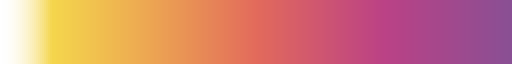

In [12]:
from matplotlib.colors import LinearSegmentedColormap

colors_with_positions = [
    (0.0, (255 / 255, 255 / 255, 255 / 255, 0.02)),     # 0%
    (0.1, (241 / 255, 197 / 255, 0 / 255, 0.7)),      # 7% 3k
    (0.5, (220 / 255, 70 / 255, 51 / 255, 0.8)),      # 33% 15k
    (0.75, (171 / 255, 19 / 255, 104 / 255, 0.8)),     # 66%
    (1.0, (109 / 255, 36 / 255, 122 / 255, 0.8)),      # 100%
]

# Extract positions and colors
positions, colors = zip(*colors_with_positions)

# Create the colormap using the positions
colour_map = LinearSegmentedColormap.from_list("soc", list(zip(positions, colors)))
colour_map

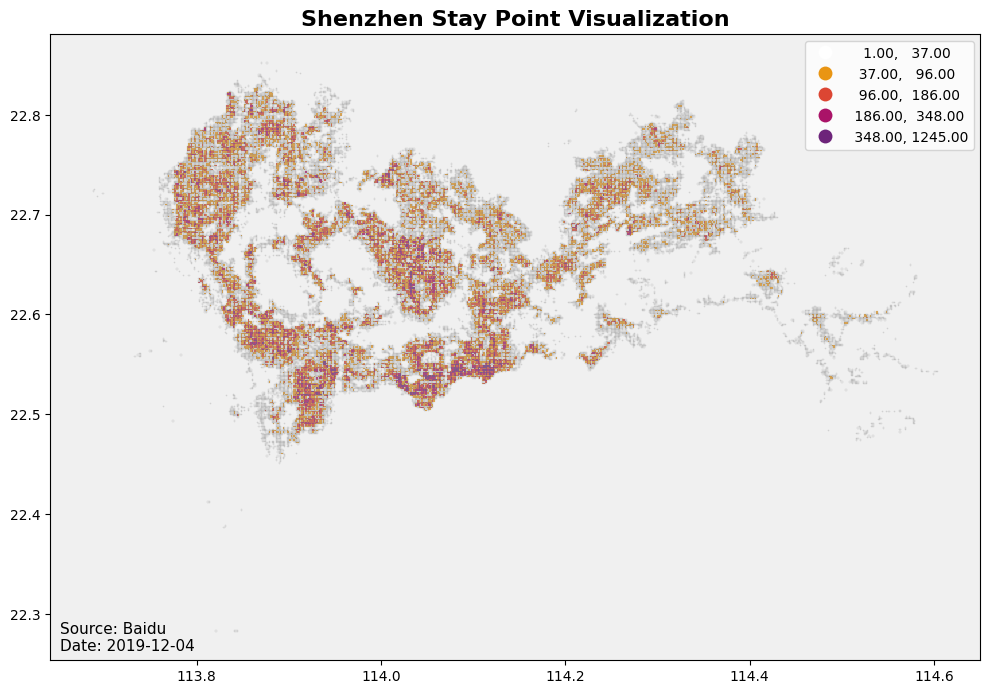

In [13]:
ax = grid.plot(column='OD', figsize=(12, 12), cmap=colour_map, scheme='NaturalBreaks', k=5, legend=True, ec='grey', lw=0.1)
ax.set_facecolor('#f0f0f0')
ax.set_title("Shenzhen Stay Point Visualization", fontsize=16, fontweight='bold')

source = "Source: Baidu"
date_info = "Date: 2019-12-04"      
ax.text(0.01, 0.01, f"{source}\n{date_info}", transform=ax.transAxes,
        fontsize=11, color='black', ha='left', va='bottom')

plt.show()